Question 1 — The DS Problem

In your own words, formulate the Data Science problem that you were given.

The problem given involves analyzing flight delay data from 2019 for flights from Arizona, Nevada, and California from the Bureau of Transportation Statistics. The objective is to analyze patterns in air traffic at different airports from these states and determine which airlines tend to have the most delays. This provides insights into factors contributing to flight delays and the overall efficiency of air travel in these regions.

Question 2 — Prepare the Data (10 pts)

In [5]:
import pandas as pd

In [6]:
#load data from csv file
airline_data = pd.read_csv('2019 OnTime Reporting FSW.csv') 

# Display the data types and check for missing values
print("Data Types Before Conversion:")
print(airline_data.info())

#Check for missing values
print("\nMissing Values in Each Column:")
print(airline_data.isnull().sum())

#Convert categorical columns to correct data types
airline_data['FL_DATE'] = pd.to_datetime(airline_data['FL_DATE'], format='%Y-%m-%d')

#Impute missing value in Tail_Num with mode
most_frequent_tail_num = airline_data['TAIL_NUM'].mode()[0]
airline_data['TAIL_NUM'].fillna(most_frequent_tail_num, inplace=True)
# Impute missing continuous values for departure and arrival delays)
airline_data['DEP_TIME'].fillna(airline_data['DEP_TIME'].median(), inplace=True)
airline_data['DEP_DELAY'].fillna(airline_data['DEP_DELAY'].median(), inplace=True)
airline_data['ARR_TIME'].fillna(airline_data['ARR_TIME'].median(), inplace=True)
airline_data['ARR_DELAY'].fillna(airline_data['ARR_DELAY'].median(), inplace=True)
airline_data['ELAPSED_TIME'].fillna(airline_data['ELAPSED_TIME'].median(), inplace=True)

# Convert 'CARRIER_CODE', 'TAIL_NUM', 'ORIGIN', 'ORIGIN_ST', 'DEST', 'DEST_ST' to categorical data
categorical_columns = ['CARRIER_CODE', 'TAIL_NUM', 'ORIGIN', 'ORIGIN_ST', 'DEST', 'DEST_ST']
for col in categorical_columns:
    airline_data[col] = airline_data[col].astype('category')
    
# Print updated data types
print("\nData Types After Conversion:")
print(airline_data.dtypes)

# Confirm no missing values
print("\nMissing Values After Imputation:")
print(airline_data.isnull().sum())

Data Types Before Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FL_DATE       object 
 1   CARRIER_CODE  object 
 2   TAIL_NUM      object 
 3   FL_NUM        int64  
 4   ORIGIN        object 
 5   ORIGIN_ST     object 
 6   DEST          object 
 7   DEST_ST       object 
 8   DEP_TIME      float64
 9   DEP_DELAY     float64
 10  ARR_TIME      float64
 11  ARR_DELAY     float64
 12  ELAPSED_TIME  float64
 13  DISTANCE      int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 202.7+ MB
None

Missing Values in Each Column:
FL_DATE             0
CARRIER_CODE        0
TAIL_NUM         4791
FL_NUM              0
ORIGIN              0
ORIGIN_ST           0
DEST                0
DEST_ST             0
DEP_TIME        26707
DEP_DELAY       26715
ARR_TIME        28244
ARR_DELAY       31884
ELAPSED_TIME    31884
DISTANCE            0
dtype: int64

Da

I converted FL_DATE to datetime format because date-based analysis, such as calculating delays by month, requires a format that supports time-based operations. Columns like CARRIER_CODE, TAIL_NUM, ORIGIN, ORIGIN_ST, DEST, and DEST_ST were converted to categorical data types to reduce memory usage and improve performance during analysis by efficiently handling repeated values. For missing values, TAIL_NUM was imputed using the mode, as it represents aircraft identifiers, and filling with the most frequent value helps minimize bias. For the continuous variables (e.g., DEP_TIME, DEP_DELAY), missing values were filled using the median, which avoids distortion caused by outliers and maintains data integrity.

The dataset consists of flight performance data from the Bureau of Transportation Statistics, focusing on airline on-time performance for the year 2019. It includes flights that originated or departed from three states: Arizona (AZ), Nevada (NV), and California (CA). Key variables in the dataset include flight dates, carrier codes, departure and arrival times, delays, and distances. This data is important for analyzing air traffic patterns, understanding which airlines are more prone to delays, and identifying factors that contribute to overall flight performance.


In [9]:
import matplotlib.pyplot as plt

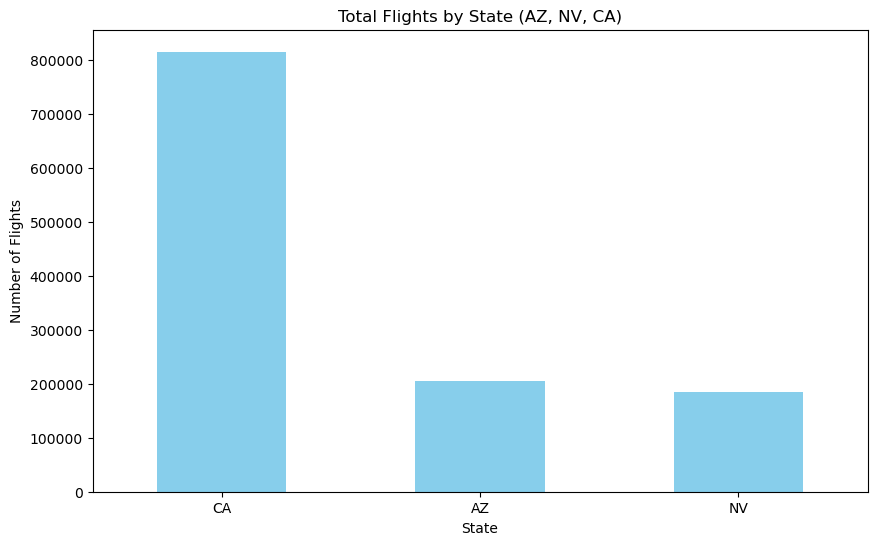

In [10]:
#3 visualizations to for problem 1
# Count total flights by state
flights_by_state = airline_data['ORIGIN_ST'].value_counts()
state_order = ['CA', 'AZ', 'NV']
flights_by_state_ordered = flights_by_state.reindex(state_order, fill_value=0)
plt.figure(figsize=(10, 6))
flights_by_state_ordered.plot(kind='bar', color='skyblue')
plt.title('Total Flights by State (AZ, NV, CA)')
plt.xlabel('State')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.show()

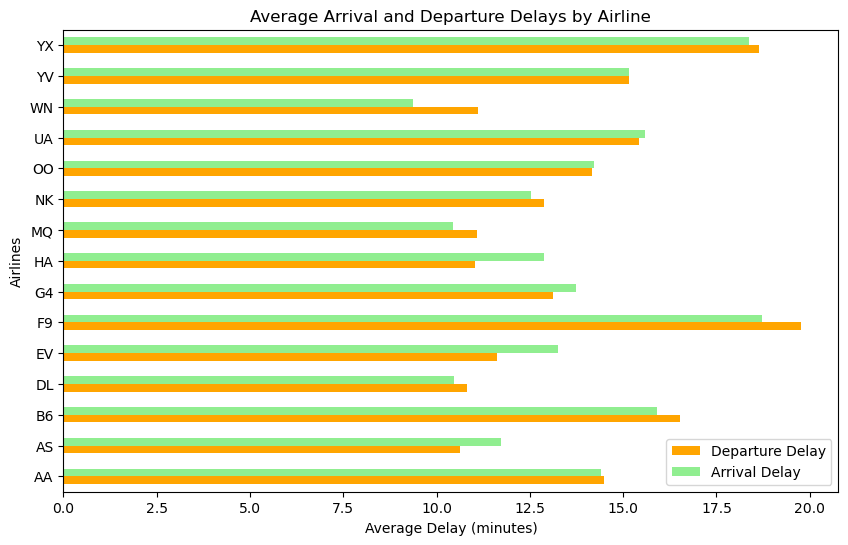

In [11]:
# Calculate average delays by airline
average_delays = airline_data.groupby('CARRIER_CODE',observed = True)[['DEP_DELAY', 'ARR_DELAY']].mean()

# A horizontal bar chart
average_delays.plot(kind='barh', figsize=(10, 6), color=['orange', 'lightgreen'])
plt.title('Average Arrival and Departure Delays by Airline')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airlines')
plt.legend(['Departure Delay', 'Arrival Delay'])
plt.show()

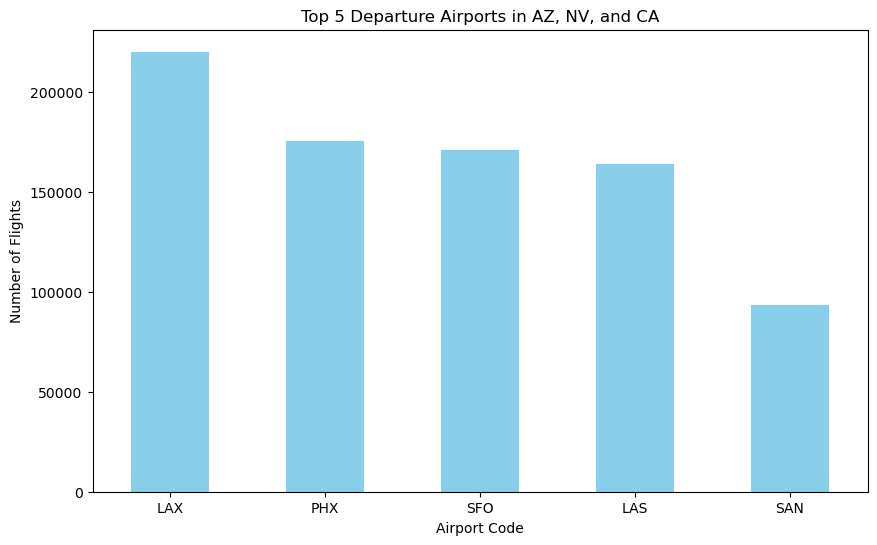

In [12]:
# Count flights by origin airport and get the top 5
top_departure_airports = airline_data['ORIGIN'].value_counts().head(5)
plt.figure(figsize=(10, 6))
top_departure_airports.plot(kind='bar', color='skyblue')
plt.title('Top 5 Departure Airports in AZ, NV, and CA')
plt.xlabel('Airport Code')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.show()